In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

# Exploration of data / checking data types

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
for col in df.columns:
    if df[col].dtype=='object':
        print (col)
        print (df[col].unique())
        print (df[col].nunique())

sex
['female' 'male']
2
smoker
['yes' 'no']
2
region
['southwest' 'southeast' 'northwest' 'northeast']
4


# Visualizing data

<AxesSubplot:xlabel='sex', ylabel='charges'>

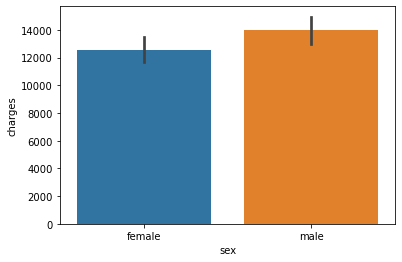

In [9]:
sns.barplot(x='sex',y='charges',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

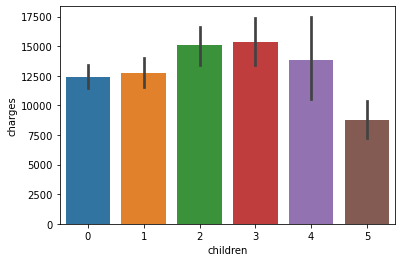

In [10]:
sns.barplot(x='children',y='charges',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

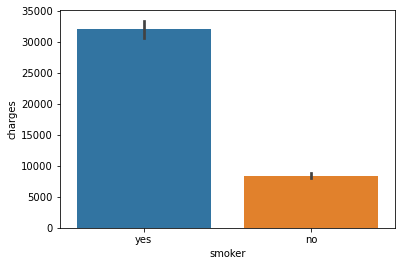

In [11]:
sns.barplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

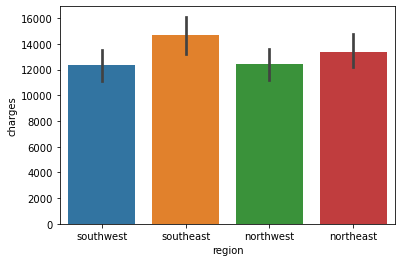

In [12]:
sns.barplot(x='region',y='charges',data=df)

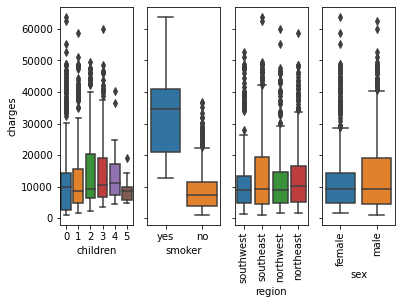

In [13]:
fig, axes = plt.subplots(1,4,sharey=True) #We will plot children, smoker, region, sex; 

plot_children = sns.boxplot(y= 'charges', x="children", data=df,  orient='v' , ax=axes[0])
plot_smoker = sns.boxplot(y= 'charges',x="smoker", data=df,  orient='v' , ax=axes[1])
plot_region = sns.boxplot(y= 'charges',x="region", data=df,  orient='v' , ax=axes[2])
plot_sex = sns.boxplot(y= 'charges',x="sex", data=df,  orient='v' , ax=axes[3])
plot_region.set_xticklabels(labels=df['region'].unique(),rotation = 90)
plot_sex.set_xticklabels(labels=df['sex'].unique(),rotation = 90)
for i in axes[1:4]:
    i.set_ylabel('')   
    
plt.show()

# Data preprocessing

In [14]:
y=df['charges']

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le_col=['sex','smoker']

for col in le_col:
    df[col]=pd.DataFrame(le.fit_transform(df[col]))
    
    
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [16]:
OH=pd.get_dummies(df['region'])
OH

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [17]:
train=pd.concat([df,OH], axis=1)
train

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1


In [18]:
train.drop(columns=['region','southwest'],inplace=True)
train

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0
1334,18,0,31.920,0,0,2205.98080,1,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1
1336,21,0,25.800,0,0,2007.94500,0,0,0


In [19]:
train_copy=train.copy()

train.drop(columns=['charges'],inplace=True)

train

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,19,0,27.900,0,1,0,0,0
1,18,1,33.770,1,0,0,0,1
2,28,1,33.000,3,0,0,0,1
3,33,1,22.705,0,0,0,1,0
4,32,1,28.880,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0
1334,18,0,31.920,0,0,1,0,0
1335,18,0,36.850,0,0,0,0,1
1336,21,0,25.800,0,0,0,0,0


In [20]:
train_copy

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0
1334,18,0,31.920,0,0,2205.98080,1,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1
1336,21,0,25.800,0,0,2007.94500,0,0,0


# Standardization of features

In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

train_copy['bmi']=scaler.fit_transform(train_copy[['bmi']])
train_copy['charges']=scaler.fit_transform(train_copy[['charges']])


train_copy

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,0,-0.453320,0,1,0.298584,0,0,0
1,18,1,0.509621,1,0,-0.953689,0,0,1
2,28,1,0.383307,3,0,-0.728675,0,0,1
3,33,1,-1.305531,0,0,0.719843,0,1,0
4,32,1,-0.292556,0,0,-0.776802,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,0.050297,3,0,-0.220551,0,1,0
1334,18,0,0.206139,0,0,-0.914002,1,0,0
1335,18,0,1.014878,0,0,-0.961596,0,0,1
1336,21,0,-0.797813,0,0,-0.930362,0,0,0


In [22]:
y_copy=train_copy['charges']

train_copy.drop(columns=['charges'],inplace=True)

train_copy

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,19,0,-0.453320,0,1,0,0,0
1,18,1,0.509621,1,0,0,0,1
2,28,1,0.383307,3,0,0,0,1
3,33,1,-1.305531,0,0,0,1,0
4,32,1,-0.292556,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,1,0.050297,3,0,0,1,0
1334,18,0,0.206139,0,0,1,0,0
1335,18,0,1.014878,0,0,0,0,1
1336,21,0,-0.797813,0,0,0,0,0


# Training using LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=0)
    
model=LinearRegression()

model.fit(X_train,y_train)

preds=model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

r2score=r2_score(y_test,preds)

print(r2score)

0.7999876970680433


In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,preds)

31827950.22952384

In [27]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, preds)
    
print(mae)

3933.272649405236


In [28]:
model.score(X_train,y_train)

0.7370262574551635

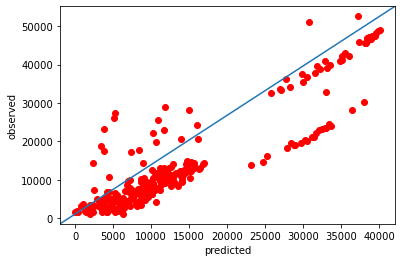

In [29]:
fig, ax= plt.subplots()

ax.plot([0,1],[0,1], transform=ax.transAxes) 
#draw y=x line      
#ax.transAxes used to indicate that The coordinate system of the Axes;
#(0,0) is bottom left of the axes, and (1,1) is top right of the axes.

plt.xlabel('predicted')
plt.ylabel('observed')
plt.scatter(preds,y_test, color='red')


# Training using standardized data

In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_copy, y_copy, test_size=0.2, random_state=0)

    
model2=LinearRegression()

model2.fit(X_train2,y_train2)

preds2=model2.predict(X_test2)

In [31]:
r2score_copy=r2_score(y_test2,preds2)

print(r2score_copy)

0.7999876970680434


In [32]:
mae2 = mean_absolute_error(y_test2, preds2)
    
print(mae2)

0.32491656941838165


In [33]:
model2.score(X_train2,y_train2)

0.7370262574551634